<a href="https://colab.research.google.com/github/Rohan171819/Deep_Learning_Projects./blob/main/Binary_CLassifiation_Customer_Churn_Prediction_Using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np

In [43]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [44]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [45]:
df.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [46]:
df.shape

(10000, 14)

In [47]:
# To chek whether any row is duplicated or not...
df.duplicated().sum()

0

In [48]:
# To check the Values of Geography..
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [49]:
# to check the values of Gender..
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [50]:
df
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)
df

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [66]:
df1=df.drop(columns=["RowNumber","CustomerId","Surname"])

In [67]:
df1
print(df1.shape)

(10000, 12)


In [72]:
X=df1.drop(columns="Exited")
print(X.shape)
Y=df1.iloc[:,-1]
print(Y.shape)

(10000, 11)
(10000,)


In [73]:
# Train test Splitting the data..
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,train_size=0.8,random_state=10)

In [74]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(8000, 11)
(8000,)
(2000, 11)
(2000,)


In [75]:
# Scaling the values..
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [77]:
# Importing necessary liberaries..
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [78]:
# Creating the ANN Architecture..
model=Sequential()
# Creating 3 Nodes in the Hidden Layer and Adding Iout data..
model.add(Dense(3,activation="sigmoid",input_dim=11))
#Creating 1 Node in the Output Layer..
model.add(Dense(1,activation="sigmoid"))

In [79]:
# Analyzing the summary of the Neural Network.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [82]:
# Compiling my model..
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [83]:
# Training my model..
history=model.fit(X_train_scaled,Y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.7405 - accuracy: 0.4593
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6867 - accuracy: 0.5534
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.6438 - accuracy: 0.7649
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5700 - accuracy: 0.9656
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4789 - accuracy: 1.0000
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3889 - accuracy: 1.0000
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3119 - accuracy: 1.0000
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.2508 - accuracy: 1.0000
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 0.2036 - accuracy: 1.0000
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.1671 - accura

In [85]:
#In order to see the Weights,biases of the First Layer of the Neural Network..
model.layers[0].get_weights()

[array([[ 7.0555285e-03,  7.0739891e-03,  7.0456034e-03],
        [ 2.3741746e-02,  2.3824496e-02,  2.3710081e-02],
        [-8.3804280e-03, -8.4182452e-03, -8.3671175e-03],
        [-1.7738925e-02, -1.7808387e-02, -1.7706456e-02],
        [ 1.6174018e-02,  1.6190872e-02,  1.6174639e-02],
        [-6.3033663e-03, -6.3292421e-03, -6.2917569e-03],
        [-1.8965270e-02, -1.9052675e-02, -1.8924540e-02],
        [ 6.7498619e-03,  6.7739263e-03,  6.7389873e-03],
        [ 2.9659875e-02,  2.9774414e-02,  2.9606273e-02],
        [-2.6372466e-03, -2.6495645e-03, -2.6322952e-03],
        [-6.2529006e+00, -5.9602404e+00, -6.3417702e+00]], dtype=float32),
 array([-1.6846228, -1.6627707, -1.6896595], dtype=float32)]

In [86]:
#In order to see the Weights,biases of the Second Layer of the Neural Network..
model.layers[1].get_weights()

[array([[-8.532248 ],
        [-8.79458  ],
        [-8.0189085]], dtype=float32),
 array([11.523877], dtype=float32)]

In [88]:
# Prediction of Neural Network..
Y_Probability=model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [92]:
# Assuminng that the values which are greater than 0.5 is termed as 1 else 0..
Y_Predicted=np.where(Y_Probability>0.5,1,0)

In [93]:
# Calulating the accuracy..
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_Predicted)

1.0

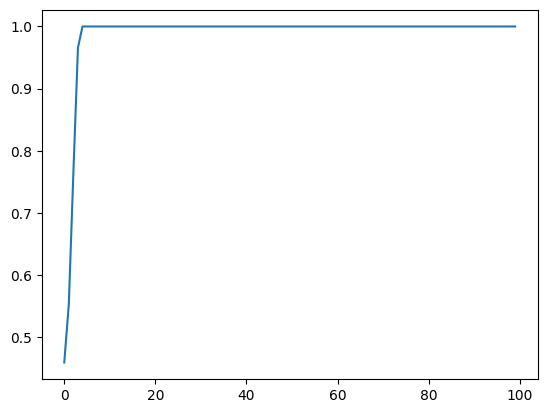

In [97]:
# Plotting the graph of accuracy and validation accuracy..
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.show()

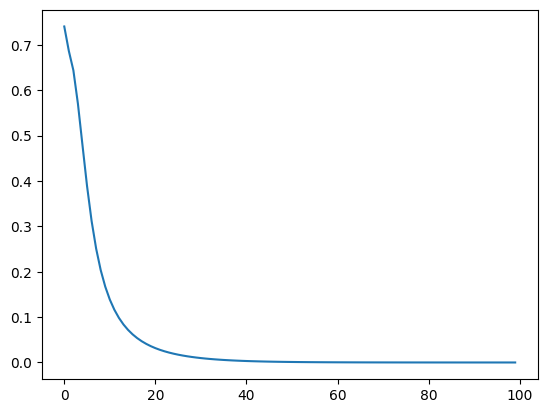

In [98]:
# Plotting the graph of accuracy and validation loss..
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.show()